In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparison of long-read aligner performance when mapping split-reads

In [9]:
path=''
bwa = pd.read_csv(f"{path}/bwa.mappings_labelled.csv", sep = '\t')
bwa_dodi = pd.read_csv(f"{path}/bwa_dodi.mappings_labelled.csv", sep = '\t')
minimap2 = pd.read_csv(f"{path}/minimap2.mappings_labelled.csv", sep = '\t')
minimap2_dodi = pd.read_csv(f"{path}/minimap2_dodi.mappings_labelled.csv", sep = '\t')
#last = pd.read_csv(f"{path}/lastal_lastsplit.mappings_labelled.csv", sep = '\t')
#last_dodi = pd.read_csv(f"{path}/lastal_dodi.mappings_labelled.csv", sep = '\t')
#ngmlr=pd.read_csv(f"{path}/ngmlr.mappings_labelled.csv", sep = '\t')

In [10]:
def create_bins(df, base):
    bins = []
    b=base
    for i in df['aln_size']:
        bins.append(base * round(i/base))
    df = df.assign(bins=bins)
    return df

In [11]:
def precision_ins_size(df):
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('bins'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)
    return bin_precision, bin_id, s

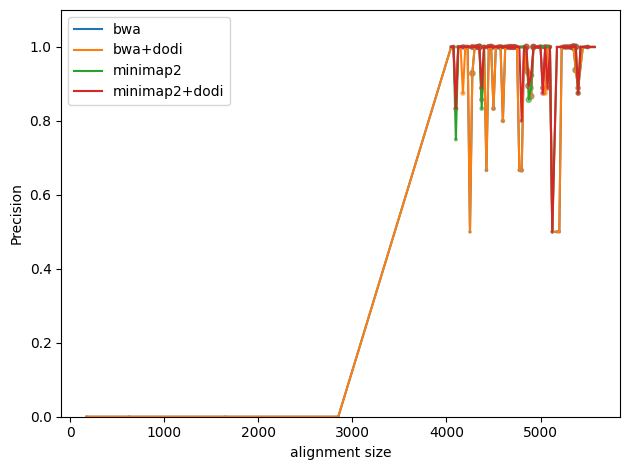

In [12]:
bwa = create_bins(bwa, 25)
bwa_dodi = create_bins(bwa_dodi, 25)
minimap2 = create_bins(minimap2, 25)
minimap2_dodi = create_bins(minimap2_dodi, 25)
#last = create_bins(last, 25)
#last_dodi = create_bins(last_dodi, 25)
#ngmlr = create_bins(ngmlr, 25)

bin_precision_bwa , bin_id_bwa , s_bwa = precision_ins_size(bwa)  



plt.plot(bin_id_bwa, bin_precision_bwa, label='bwa')

plt.scatter(bin_id_bwa, bin_precision_bwa, s=s_bwa, alpha=0.5)

plt.legend()
plt.xlabel('alignment size')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
#plt.savefig(path + '/size_vs_precision.pdf')
plt.show()

In [13]:
def wrong_bin(df):
    bin_wrong = []
    bin_w = []
    wrong = 0
    for bid, b in df.groupby('bins'):
        bin_wrong.append(wrong / len(df) * 100)
        bin_w.append(bid)
        wrong += len(b) - b['tp'].sum()
    return bin_wrong, bin_w

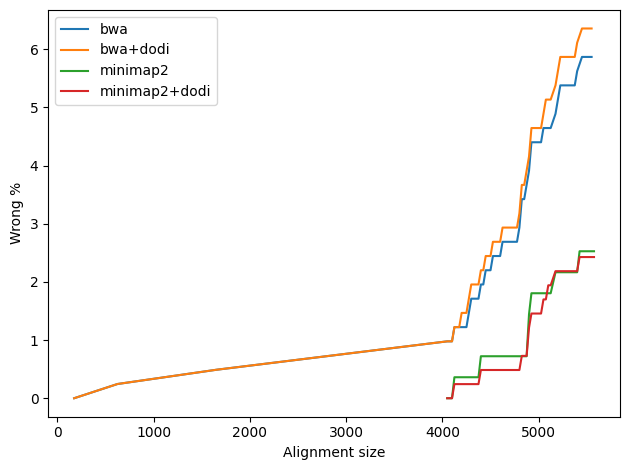

In [14]:
bin_wrong_bwa, bin_w_bwa= wrong_bin(bwa)  



plt.plot(bin_w_bwa, bin_wrong_bwa, label = 'bwa')

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('Wrong %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()

In [15]:
def tp_bin(df):
    bin_tp = []
    bin_t = []
    t = df['tp'].sum()
    for bid, b in df.groupby('bins'):
        t -= b['tp'].sum()
        bin_tp.append(t / df['tp'].sum())
        bin_t.append(bid)
    return bin_tp, bin_t

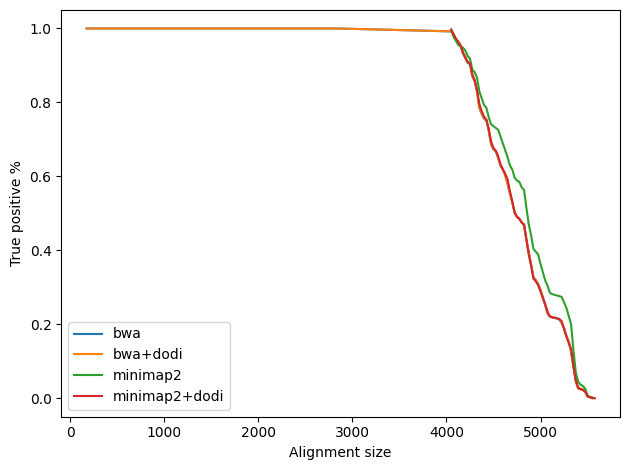

In [16]:
bin_tp_bwa, bin_t_bwa= tp_bin(bwa)  



plt.plot(bin_t_bwa, bin_tp_bwa, label = 'bwa')

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('True positive %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()

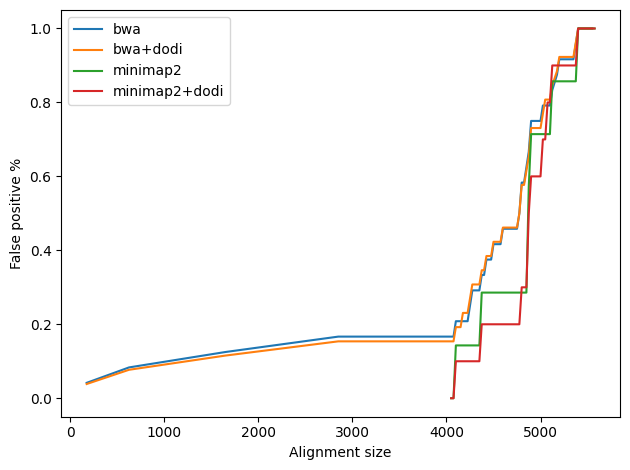

In [17]:
def fp_bin(df):
    bin_fp = []
    bin_f = []
    f = 0
    for bid, b in df.groupby('bins'):
        f += b['fp'].sum()
        bin_fp.append(f / df['fp'].sum())
        bin_f.append(bid)
    return bin_fp, bin_f

bin_fp_bwa, bin_f_bwa= fp_bin(bwa)  



plt.plot(bin_f_bwa, bin_fp_bwa, label = 'bwa')

plt.legend()
plt.xlabel('Alignment size')
plt.ylabel('False positive %')
plt.tight_layout()
#plt.savefig(prefix + 'ins_size_vs_wrong.pdf')
plt.show()

In [18]:
def precision_mapq(df):
    bin_precision = []
    bin_id = []
    s = []
    for bid, b in df.groupby('mapq'):
        s.append(len(b))
        bin_precision.append(b['tp'].sum() / (b['tp'].sum() + b['fp'].sum()))
        bin_id.append(bid)
    return bin_precision, bin_id, s

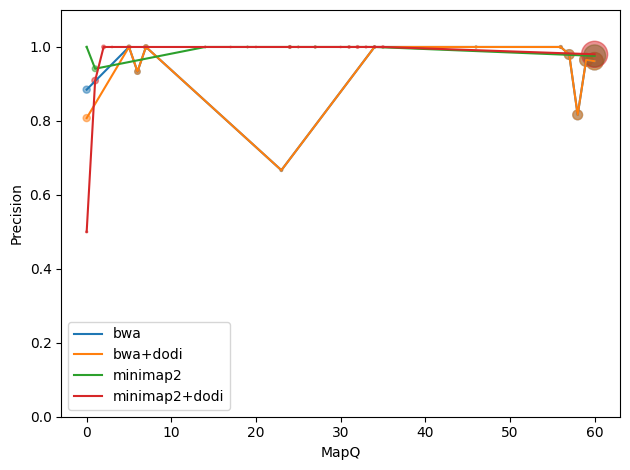

In [19]:
bin_precision_mapq_bwa , bin_id_mapq_bwa , s_mapq_bwa = precision_mapq(bwa)  


plt.plot(bin_id_mapq_bwa, bin_precision_mapq_bwa, label='bwa')

plt.scatter(bin_id_mapq_bwa, bin_precision_mapq_bwa, s=s_mapq_bwa, alpha=0.5)

plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
#plt.savefig(path + '/mapq_vs_precision.pdf')

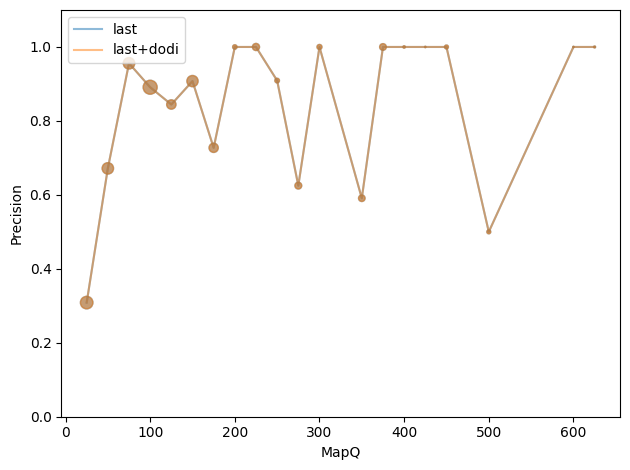

In [13]:
bin_precision_mapq_last , bin_id_mapq_last , s_mapq_last = precision_mapq(last)  
bin_precision_mapq_last_dodi , bin_id_mapq_last_dodi , s_mapq_last_dodi = precision_mapq(last_dodi)  

plt.plot(bin_id_last, bin_precision_last, label='last', alpha=0.5)
plt.plot(bin_id_last_dodi, bin_precision_last_dodi, label='last+dodi', alpha=0.5)
plt.scatter(bin_id_last, bin_precision_last, s=s_last, alpha=0.5)
plt.scatter(bin_id_last_dodi, bin_precision_last_dodi, s=s_last_dodi, alpha=0.5)

plt.legend()
plt.xlabel('MapQ')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig(path + '/last_mapq_vs_precision.pdf')